# Homework 5: Bayesian parameter estimation

Consider the dataset given in the next cell along with a model given by

$P(y | x_1, x_2, \sigma_e, \beta_0, \beta_1, \beta_2) \sim N(\beta_0 + \beta_1 x_1 + \beta_2 x_2, \sigma_e^2)$  (i.e. normally distributed with given mean and variance)

Furthermore, take the priors on the dataset to be

$\log(\sigma_e) \sim N(0,2^2)$  
$\log(\sigma_\beta) \sim N(0,2^2)$  
$\beta_0 \sim N(0,10^2)$  
$\beta_1 | \sigma_\beta \sim N(0,\sigma_\beta^2)$  
$\beta_2 | \sigma_\beta \sim N(0,\sigma_\beta^2)$ 

**Problem 1** Write down an expression for the posterior distribution of the parameters.

**Problem 2** Write a Metropolis-Hastings scheme that updates one parameter during each step ($\log(\sigma_e), \log(\sigma_\beta), \beta_0, \beta_1, \beta_2$; note: update $\log(\sigma)$ rather than $\sigma$).  Determine the stepsizes of each part of the proposal by adjusting/tuning them so that the acceptance rate within each chain is between 20-60% and run for at least 10,000 steps. Examine the value of the parameter as a function of the number of proposals.  Then examine a histogram of each of the 5 model parameters.  

**Problem 3** Repeat problem 2 by implementing a Gibbs sampler. Compare the plots that examine the the parameter values vs. the number of proposals: How do these plots compare? How do the histograms compare?

**Problem 4** Repeat problem 3 by implementing an Hamiltonian Monte Carlo algorithm.  Take the 'kinetic energy' to be $K(p) = \sum_{i=1}^5 \frac{p_i^2}{2 m_i}$.  You will need to tune the parameters $T$, $dt$, and the $m_i$'s, where $T$ is the amount of time you advance the Hamiltonian dynamics and $dt$ is the time step.  (Hint: use the stepsizes you found in problem 2 to determine the $m_i$'s).  Use may use the leapfrog algorithm I have provided below, but you will have to determine the gradient of the Hamiltonian, $\partial_q H$ and $\partial_p H$. 

**Problem 5** Estimate how many samples are needed in each of the above methods in order to achieve an 'accurate' answer.

In [7]:
import numpy as np
import pandas as pd

dataArray = np.array([[2.478,1.449,0.856],
                      [0.306,0.408,0.801],
                      [-1.062,-0.705,-0.009],
                      [-1.986,-2.055,-1.83],
                      [1.825,1.158,0.653],
                      [0.143,-0.127,-0.138],
                      [0.433,0.033,-0.107],
                      [3.726,1.018,-1.397],
                      [2.588,0.879,-0.421],
                      [1.116,0.563,0.387]])

data = pd.DataFrame(data = dataArray, columns = ["y", "x1", "x2"])

,y,x1,x2
0,2.478,1.449,0.856
1,0.306,0.408,0.801
2,-1.062,-0.705,-0.009
3,-1.986,-2.055,-1.830
4,1.825,1.158,0.653
5,0.143,-0.127,-0.138
6,0.433,0.033,-0.107
7,3.726,1.018,-1.397
8,2.588,0.879,-0.421
9,1.116,0.563,0.387


In [25]:
# Leap frog code for HMC

def leapFrog(q0, p0, dt, T, gradQ, gradP):
    qend, pend = q0.copy(), p0.copy()
    for i in range(int(T/dt)):
        delq = gradQ(qend)
        pend = np.array([p - 0.5*dt*dq for p, dq in zip(pend, delq)])
        delp = gradP(pend)
        qend = np.array([q + dt*p for q, p in zip(qend, delp)])
        delq = gradQ(qend)
        pend = np.array([p - 0.5*dt*dq for p, dq in zip(pend, delq)])
    return qend, pend

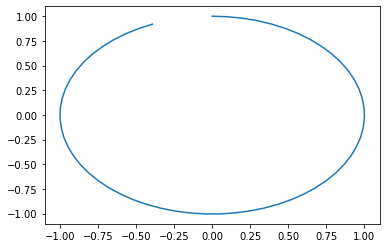

In [26]:
# Example implementation of leapfrog
q = np.array([0,1])
p = np.array([1,0])

def gradQ(q):
    return q/sum(q**2)**(3/2)

masses = np.ones(2)
def gradP(p):
    return np.array([pi/mi for pi, mi in zip(p, masses)])

# example run
leapFrog(q, p, 0.1, 1, gradQ, gradP)

#example trajectory
T = 6
path = np.empty((int(T/0.1), 2))
path[0] = q[:]
for i in range(1, int(T/0.1)):
    q, p = leapFrog(q, p, 0.1, 0.1, gradQ, gradP)
    path[i] = q[:]
    
import matplotlib.pyplot as pyplot

pyplot.plot(path[:,0], path[:,1])